In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
data = pd.read_csv('online_shoppers_intention.csv')

## Necessary data preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder1 = LabelEncoder()
data['Weekend'] = encoder1.fit_transform(data['Weekend'])
data['Revenue'] = encoder1.fit_transform(data['Revenue'])

encoder2 = LabelEncoder()
data['VisitorType'] = encoder2.fit_transform(data['VisitorType'])

encoder3 = OneHotEncoder()
data['Month'] = encoder2.fit_transform(data['Month'])

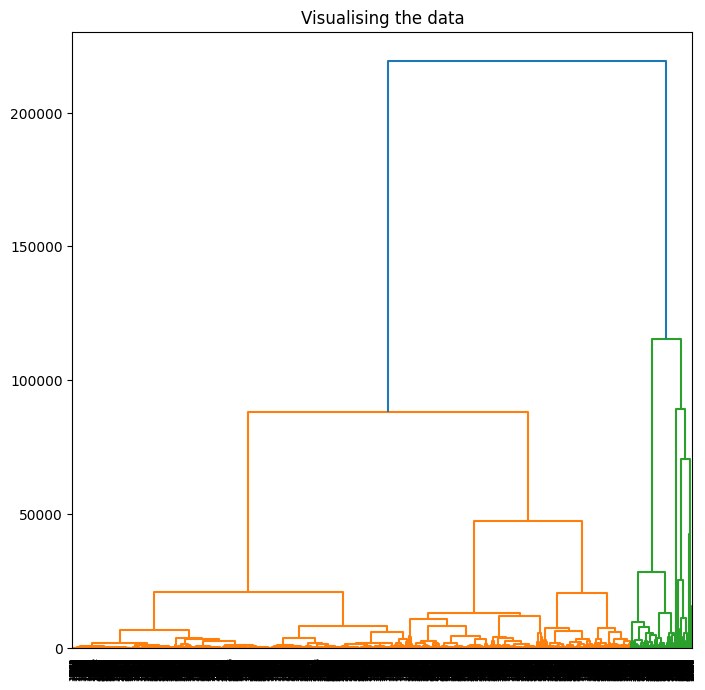

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))

# Additional data preprocessing


## No data preprocessing

In [ ]:
models = [GaussianMixture(n_components = 3, random_state = 42),
          GaussianMixture(n_components = 5, random_state = 42),
          GaussianMixture(n_components = 7, random_state = 42)]
clusters = [3, 5, 7]

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(data)
  print(f'Silhouette score: {silhouette_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.09149986235222017 for number of clusters: 3
Davies-Bouldin score: 2.6894394567727216 for number of clusters: 3
Calinski-Harabasz score: 1162.1965185541594 for number of clusters: 3
Silhouette score: -0.020808490633723687 for number of clusters: 5
Davies-Bouldin score: 5.873073992825183 for number of clusters: 5
Calinski-Harabasz score: 1560.6985466432034 for number of clusters: 5
Silhouette score: -0.20233073157343207 for number of clusters: 7
Davies-Bouldin score: 7.45766335571044 for number of clusters: 7
Calinski-Harabasz score: 1173.5804160940454 for number of clusters: 7


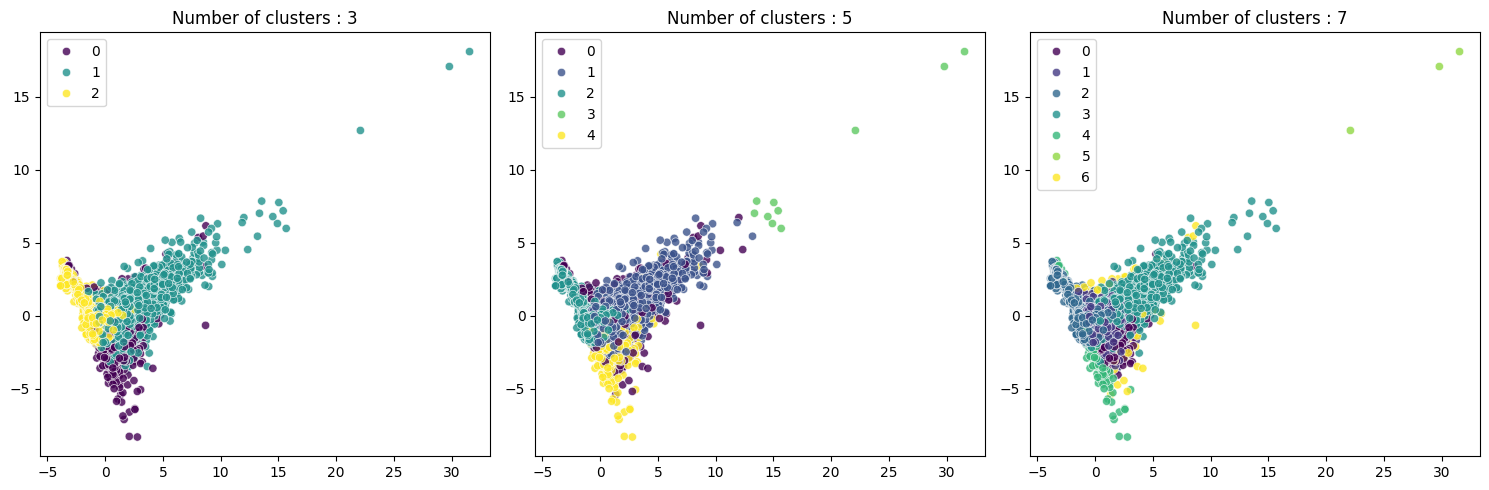

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Standardization & PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
new_data = scaler.fit_transform(data)

pca = PCA(n_components = 2)
new_data = pca.fit_transform(new_data)

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.3581619843751057 for number of clusters: 3
Davies-Bouldin score: 0.9369033977452257 for number of clusters: 3
Calinski-Harabasz score: 6766.9123870459225 for number of clusters: 3
Silhouette score: 0.3242997570181276 for number of clusters: 5
Davies-Bouldin score: 1.0883427654472047 for number of clusters: 5
Calinski-Harabasz score: 6439.200737439766 for number of clusters: 5
Silhouette score: 0.25198352399908275 for number of clusters: 7
Davies-Bouldin score: 1.7387682425507767 for number of clusters: 7
Calinski-Harabasz score: 5316.857467191979 for number of clusters: 7


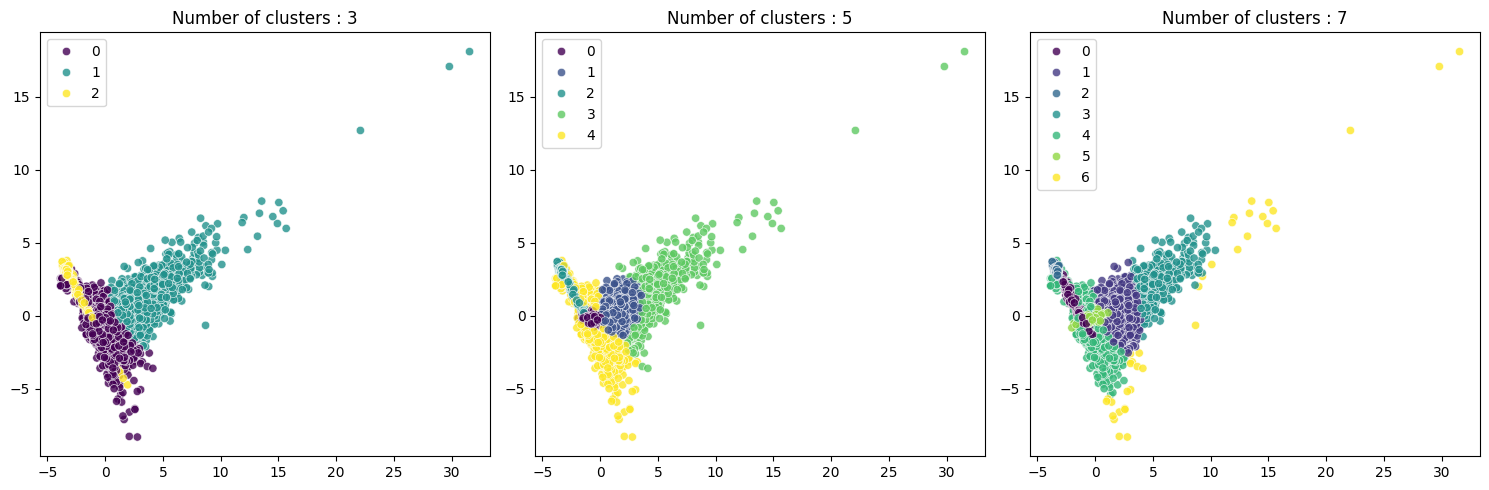

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = new_data[:, 0], y = new_data[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Min-Max Scaling & Outlier removal

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_data = scaler.fit_transform(new_data)

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.0759919238164093 for number of clusters: 3
Davies-Bouldin score: 2.9611843855850446 for number of clusters: 3
Calinski-Harabasz score: 99.84795823432997 for number of clusters: 3
Silhouette score: 0.026358104659547073 for number of clusters: 5
Davies-Bouldin score: 2.4163252508728883 for number of clusters: 5
Calinski-Harabasz score: 96.42677008074301 for number of clusters: 5
Silhouette score: -0.014386906071034353 for number of clusters: 7
Davies-Bouldin score: 2.939198342684193 for number of clusters: 7
Calinski-Harabasz score: 57.47455257015288 for number of clusters: 7


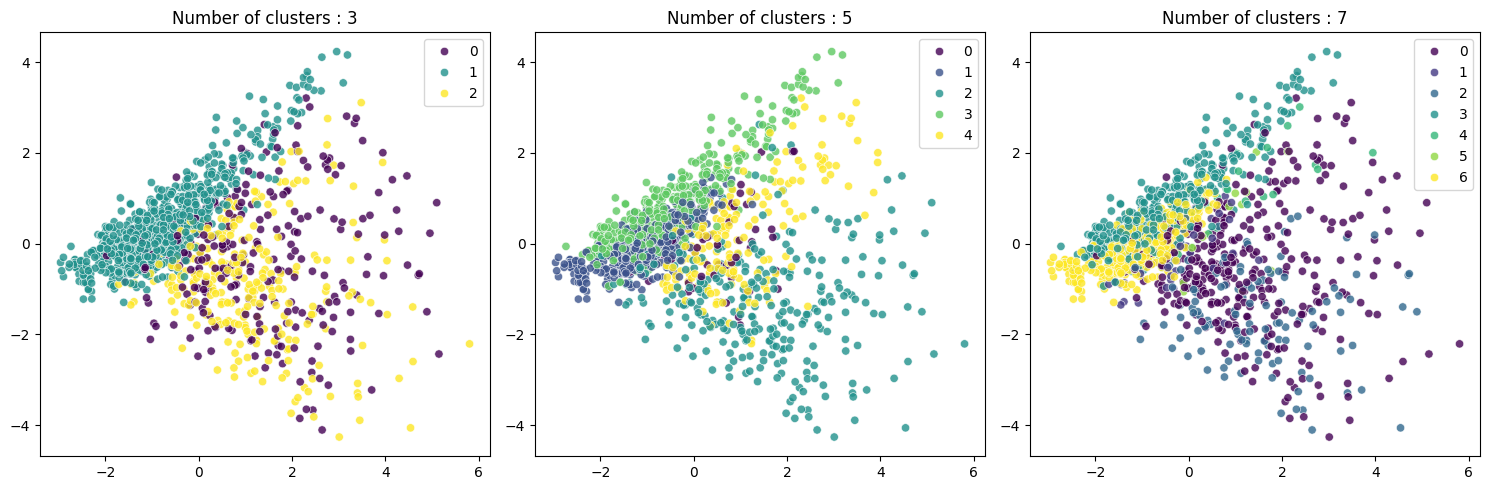

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Log transformation & normalization

In [ ]:
new_data = np.log1p(data + 1)

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
new_data = normalizer.fit_transform(new_data)

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.24553844205496644 for number of clusters: 3
Davies-Bouldin score: 1.5646903023812062 for number of clusters: 3
Calinski-Harabasz score: 3266.854013533485 for number of clusters: 3
Silhouette score: 0.27910608179721685 for number of clusters: 5
Davies-Bouldin score: 1.2876324460594661 for number of clusters: 5
Calinski-Harabasz score: 4706.251674303035 for number of clusters: 5
Silhouette score: 0.18784192668757296 for number of clusters: 7
Davies-Bouldin score: 2.0560265221199354 for number of clusters: 7
Calinski-Harabasz score: 3403.808001983854 for number of clusters: 7


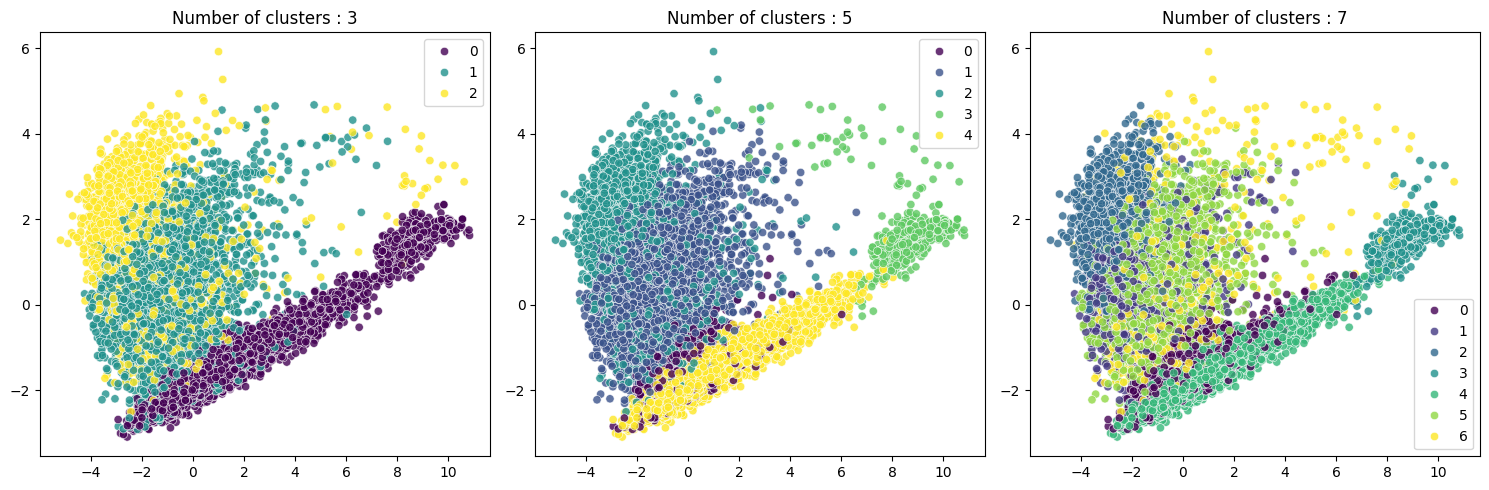

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Feature selection & discretization

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold = 0.01)
new_data = var_thresh.fit_transform(data)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
new_data = discretizer.fit_transform(new_data)

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.2620165147058319 for number of clusters: 3
Davies-Bouldin score: 2.09870549093607 for number of clusters: 3
Calinski-Harabasz score: 2460.3134459438656 for number of clusters: 3
Silhouette score: 0.22763903099212685 for number of clusters: 5
Davies-Bouldin score: 2.1345480675044275 for number of clusters: 5
Calinski-Harabasz score: 1832.581488768773 for number of clusters: 5
Silhouette score: 0.1944052614532067 for number of clusters: 7
Davies-Bouldin score: 2.2079625719430473 for number of clusters: 7
Calinski-Harabasz score: 1621.3305227661845 for number of clusters: 7


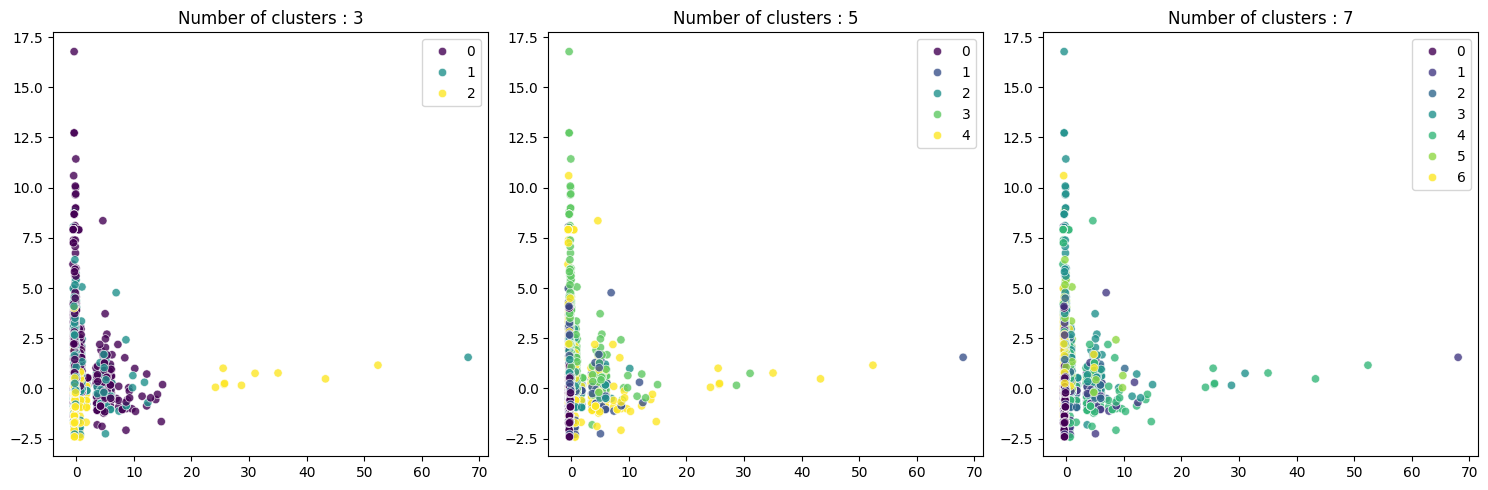

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Robust Scaling & Feature Engineering

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
new_data = scaler.fit_transform(data)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
new_data = poly.fit_transform(new_data)

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.97854724710001 for number of clusters: 3
Davies-Bouldin score: 0.4715396976482136 for number of clusters: 3
Calinski-Harabasz score: 34417.50159970636 for number of clusters: 3
Silhouette score: 0.974747288957319 for number of clusters: 5
Davies-Bouldin score: 0.42171797618410406 for number of clusters: 5
Calinski-Harabasz score: 52336.91838536969 for number of clusters: 5
Silhouette score: -0.14536381695579684 for number of clusters: 7
Davies-Bouldin score: 1.4859981406447524 for number of clusters: 7
Calinski-Harabasz score: 31109.889590513016 for number of clusters: 7


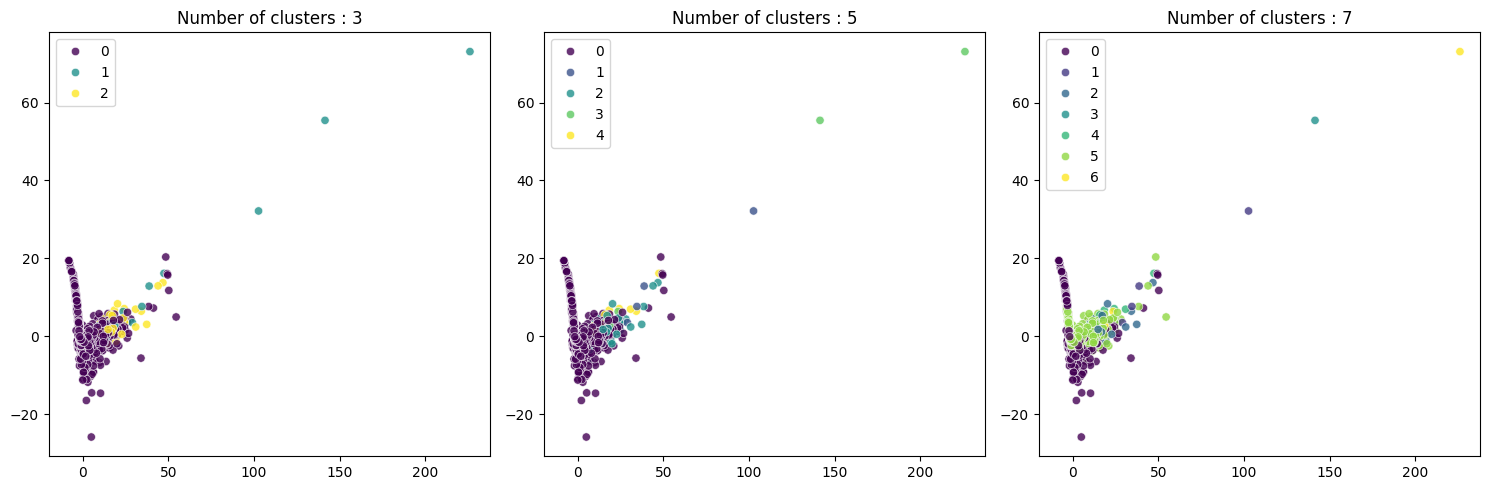

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()